# Diabetes Prediction - Logistic Regression


## Importing the necessary libraries:


In [1]:
import numpy as np
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [2]:
file="E:\Personal Portfolio\Datasets\diabetes.csv"
dataset=pd.read_csv(file)
df=dataset.copy()

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,197,70,99,0,34.7,0.575,62,1
1,13,106,72,54,0,36.6,0.178,45,0
2,0,147,85,54,0,42.8,0.375,24,0
3,0,151,90,46,0,42.1,0.371,21,1
4,7,152,88,44,0,50.0,0.337,36,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preparation

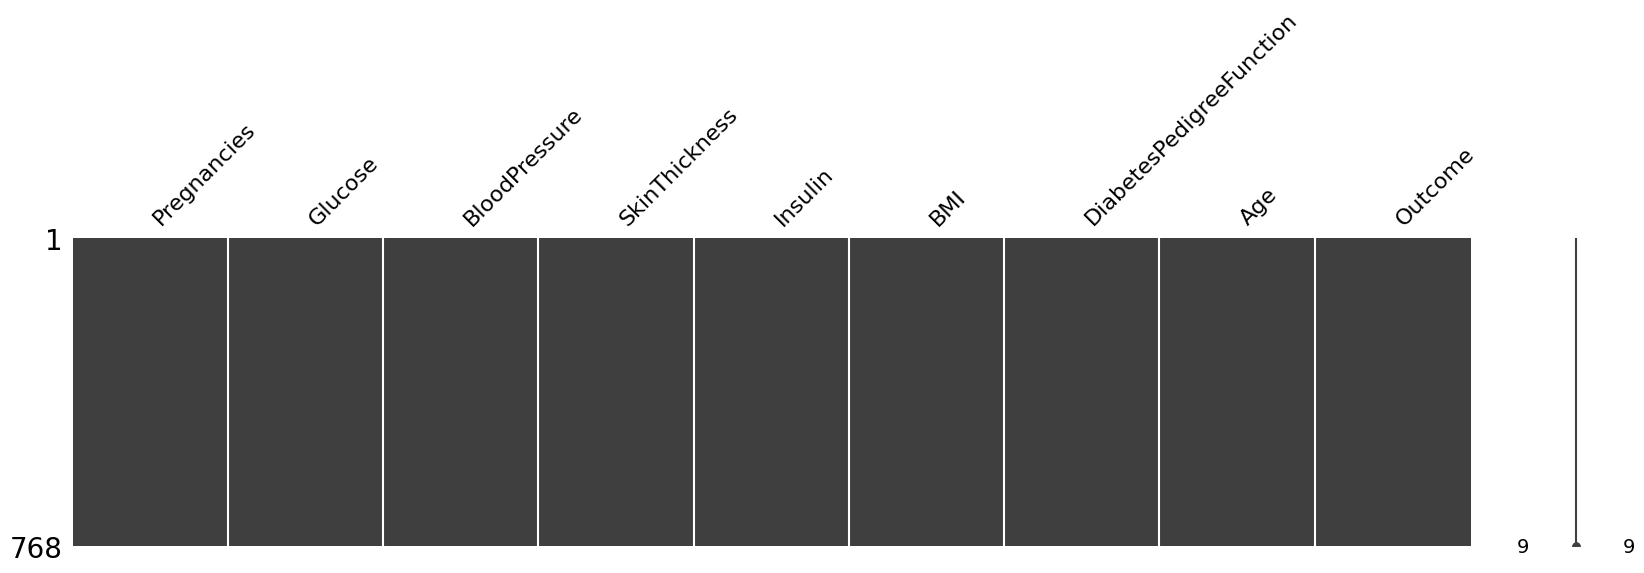

In [12]:
missing_values=msno.matrix(df,figsize=(20,4))


In [123]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Visualization of Outcome variable

In [124]:
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

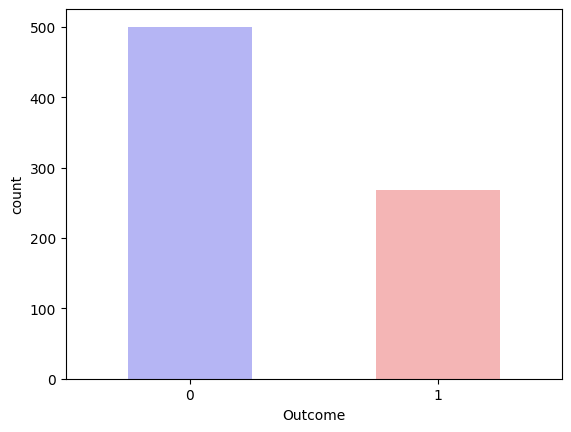

In [125]:
f = sns.countplot(x="Outcome", data=df, palette="bwr",width=0.5)
plt.show()

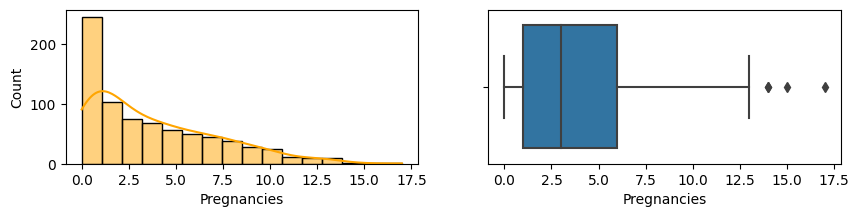

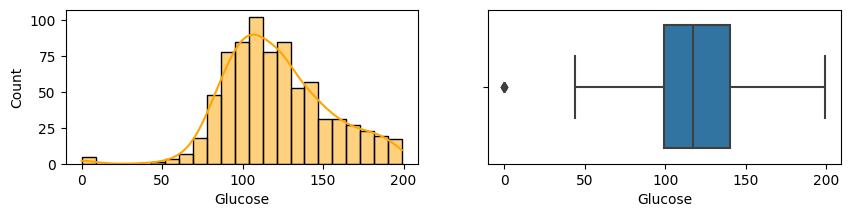

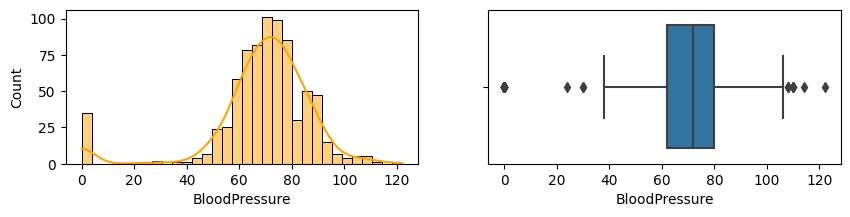

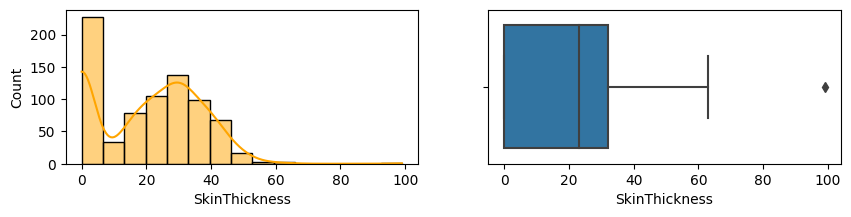

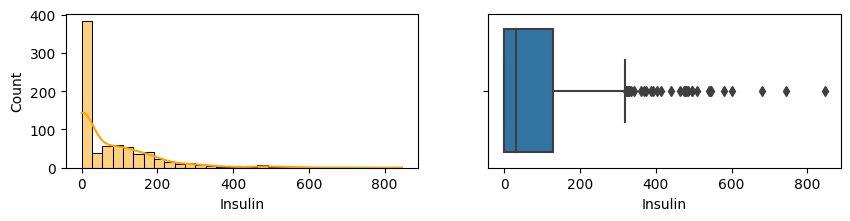

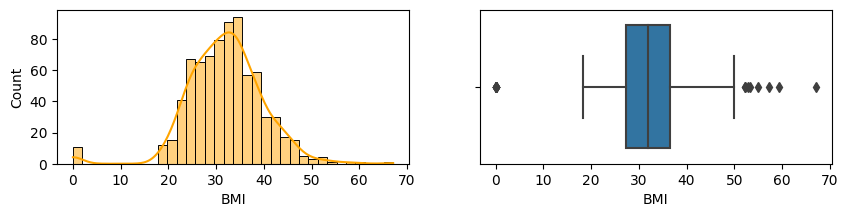

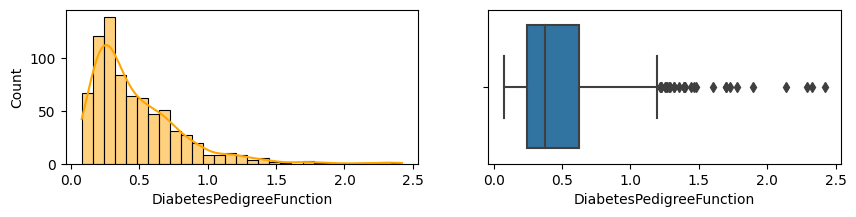

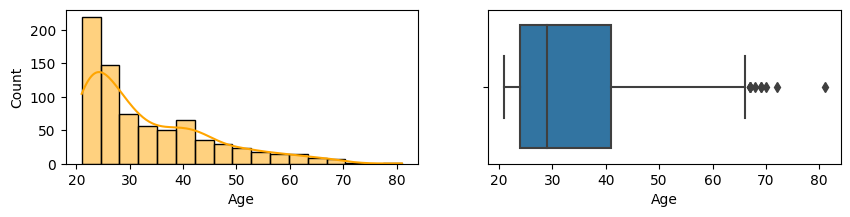

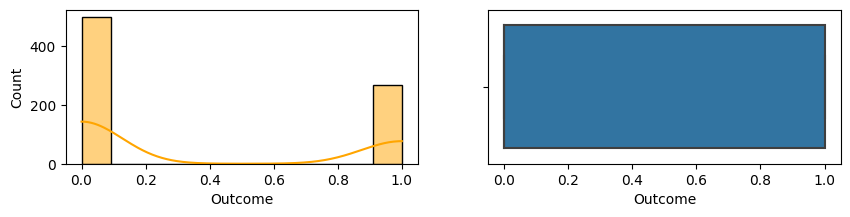

In [14]:
for i in df.columns:
    fig,ax = plt.subplots(1,2, figsize=(10,2))
    sns.histplot(data=df, x=i, ax=ax[0],kde = True, color="orange")
    sns.boxplot(data=df, x=i, ax=ax[1])


Handling incorrect values

In [15]:
def median(var):
    df[var]=df[var].replace(0,np.nan)
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

#Glucose

In [16]:
median("Glucose")

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [129]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

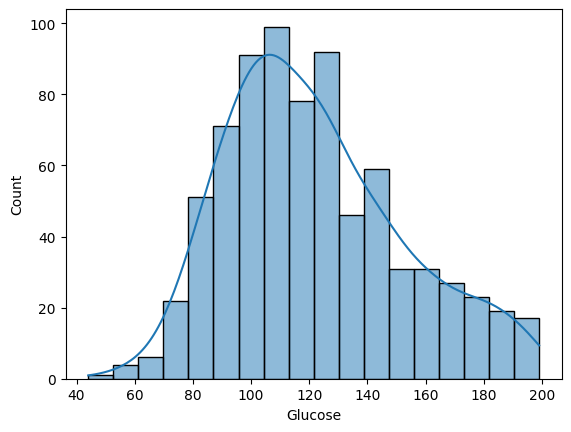

In [130]:
sns.histplot(data=df, x=df["Glucose"],kde=True)

#BloodPressure

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

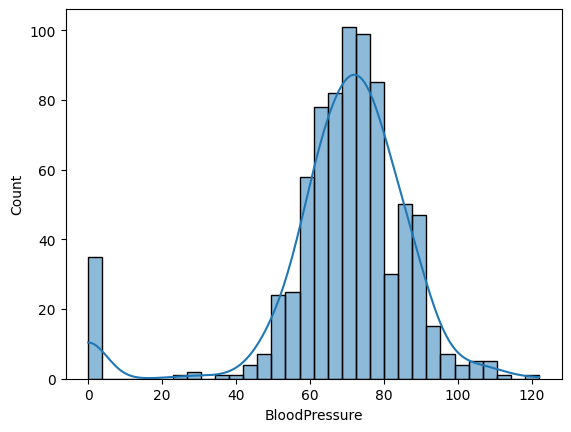

In [17]:
sns.histplot(data=df, x=df["BloodPressure"],kde=True)

In [18]:
median("BloodPressure")

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [19]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

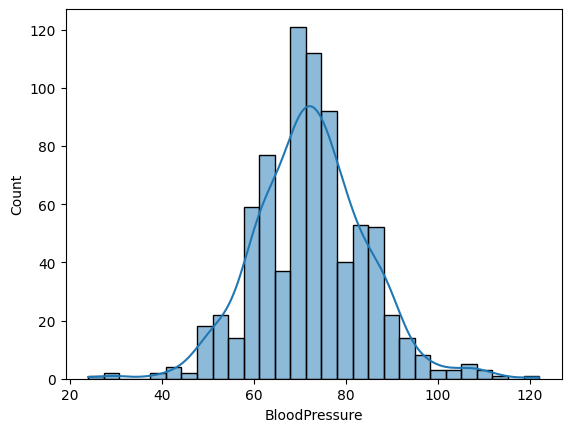

In [20]:
sns.histplot(data=df,x=df["BloodPressure"],kde=True)

#SkinThickness

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

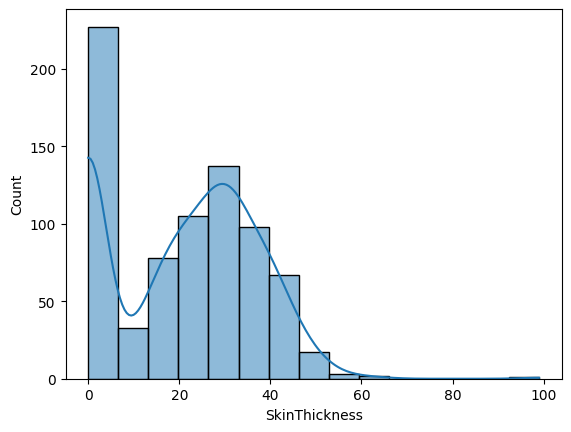

In [21]:
sns.histplot(data=df,x=df["SkinThickness"],kde=True)

In [22]:
median("SkinThickness")

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [23]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

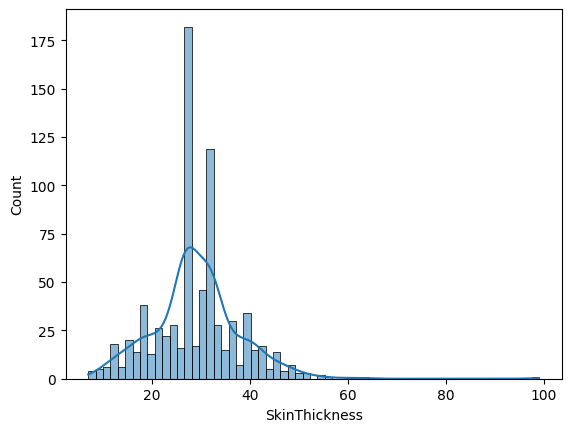

In [24]:
sns.histplot(data=df,x=df["SkinThickness"],kde=True)

<!-- #Insulin

sns.histplot(data=df, x=df["Insulin"],kde=True)
median("Insulin")
df["Insulin"].isnull().sum()
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5
sns.histplot(data=df, x=df["Insulin"],kde=True) -->


#Insulin

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

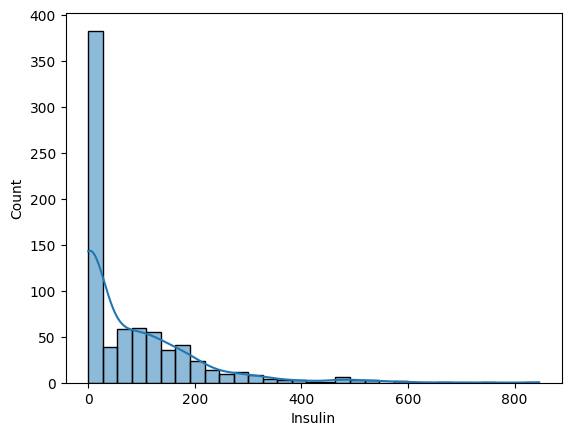

In [139]:
sns.histplot(data=df,x=df["Insulin"],kde=True)

In [140]:
median("Insulin")


,Outcome,Insulin
0,0,102.5
1,1,169.5


<AxesSubplot: xlabel='Insulin', ylabel='Count'>

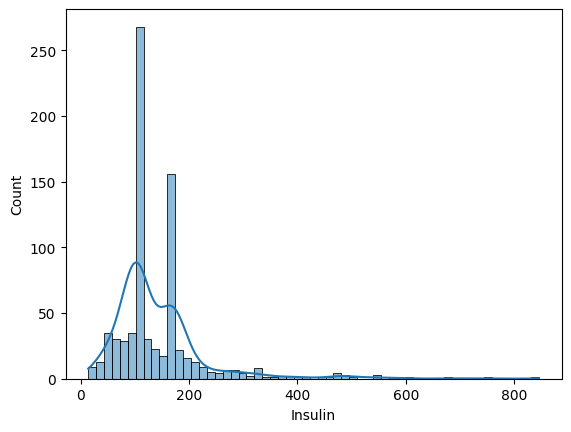

In [141]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5
sns.histplot(data=df,x=df["Insulin"],kde=True)

#BMI

In [142]:
df["BMI"].sort_values(ascending=True)

148     0.0
364     0.0
496     0.0
328     0.0
108     0.0
       ... 
518    53.2
517    55.0
707    57.3
374    59.4
579    67.1
Name: BMI, Length: 768, dtype: float64

<AxesSubplot: xlabel='BMI', ylabel='Count'>

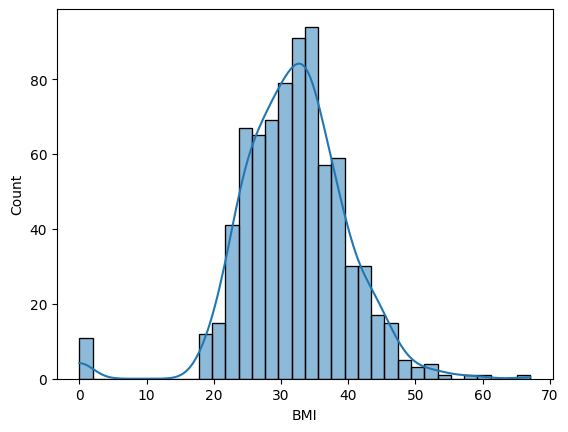

In [143]:
sns.histplot(data=df, x=df["BMI"],kde=True)

In [144]:
median("BMI")

,Outcome,BMI
0,0,30.1
1,1,34.3


In [145]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 32

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

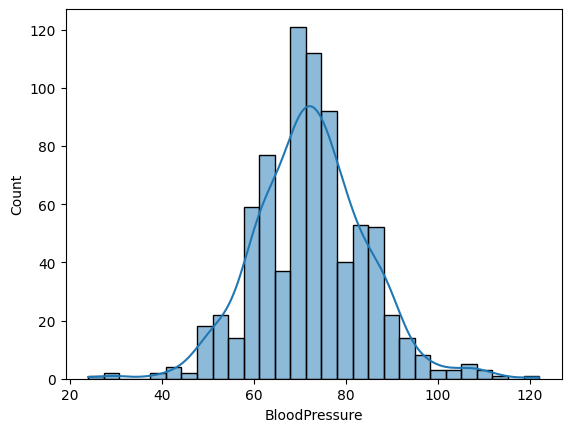

In [146]:
sns.histplot(data=df, x=df["BloodPressure"],kde=True)

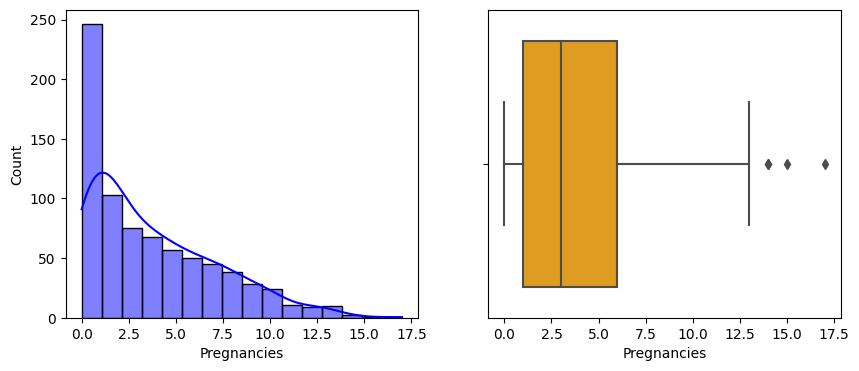

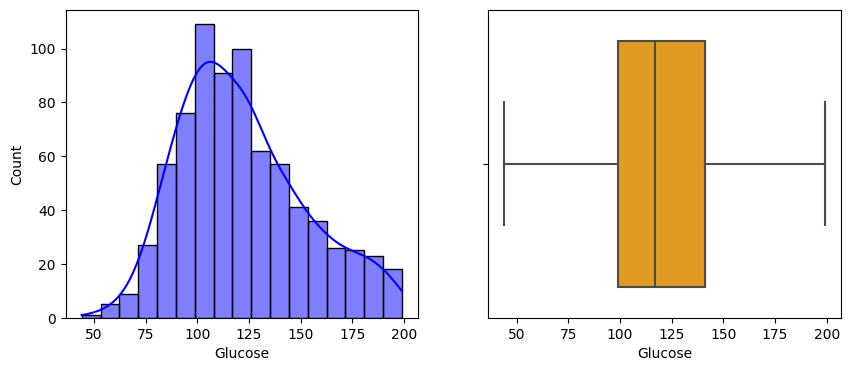

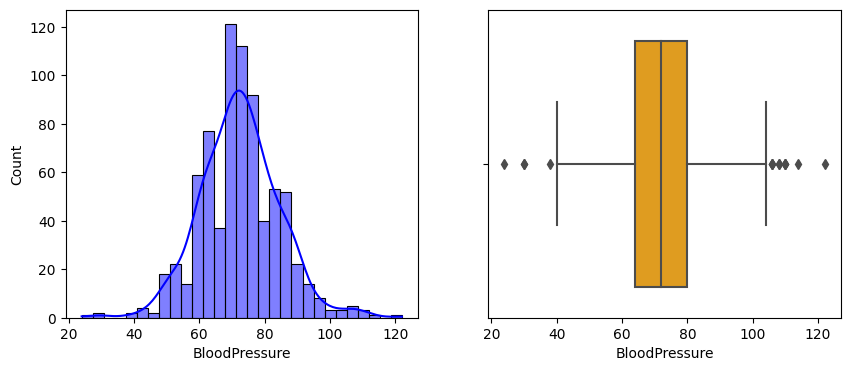

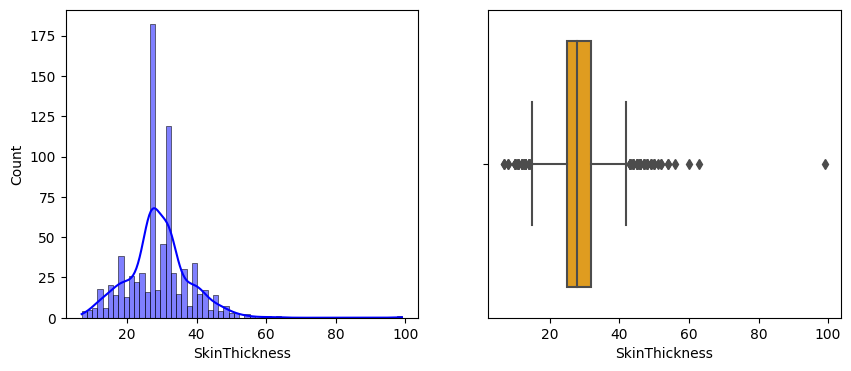

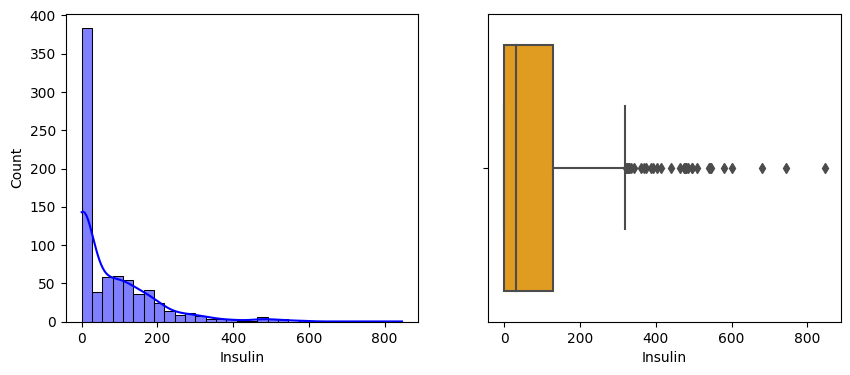

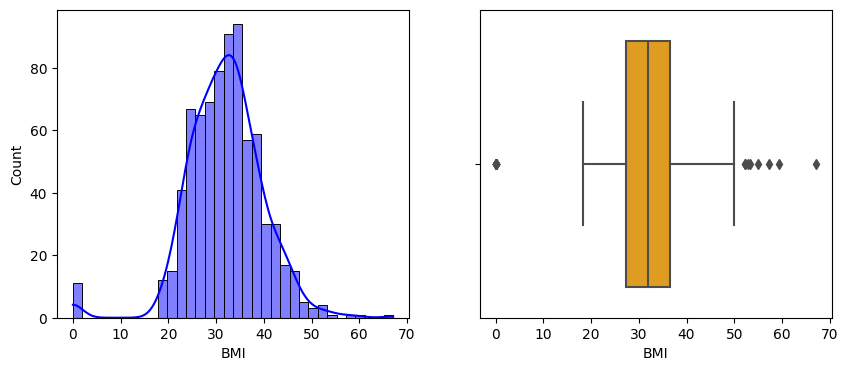

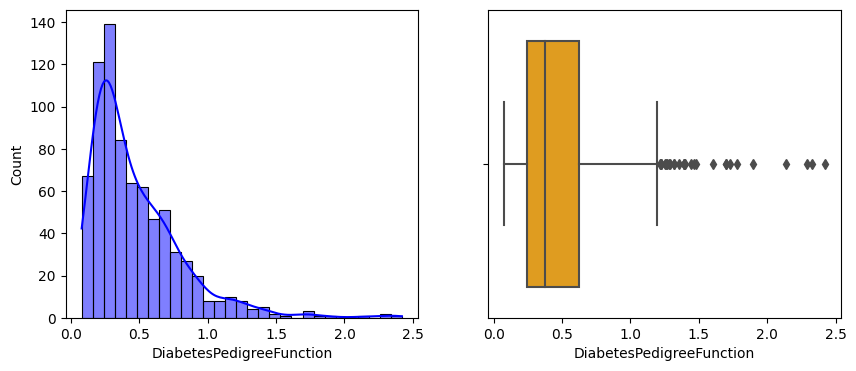

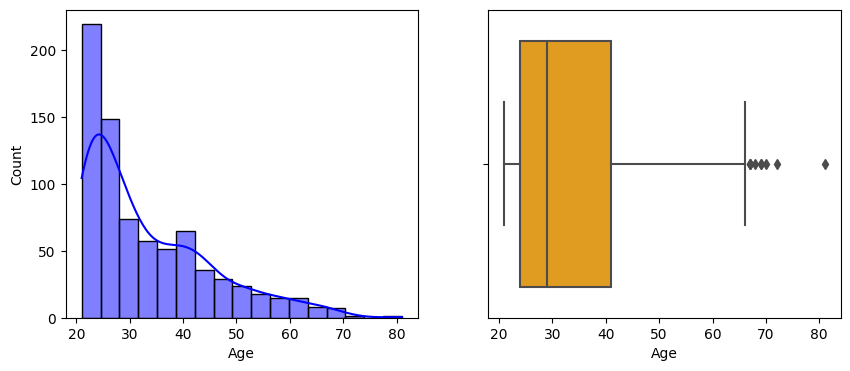

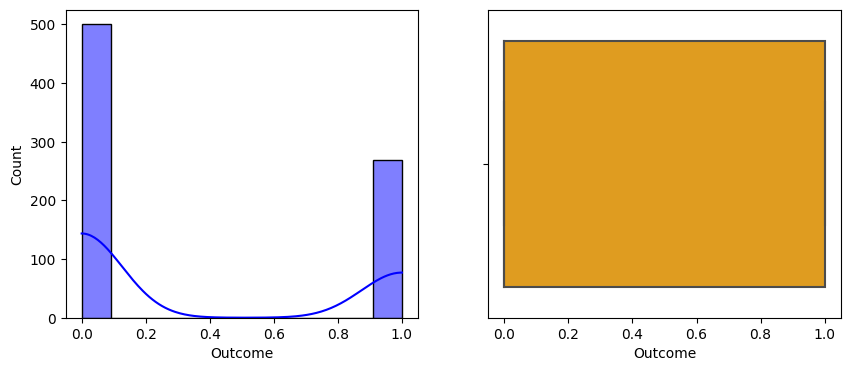

In [25]:
for i in df.columns:
    fig,ax=plt.subplots(1,2, figsize=(10,4))
    sns.histplot(data=df, x=i, ax=ax[0],kde = True,color="Blue")
    sns.boxplot(data=df, x=i, ax=ax[1],color="orange")

Feature Engineering

<AxesSubplot: >

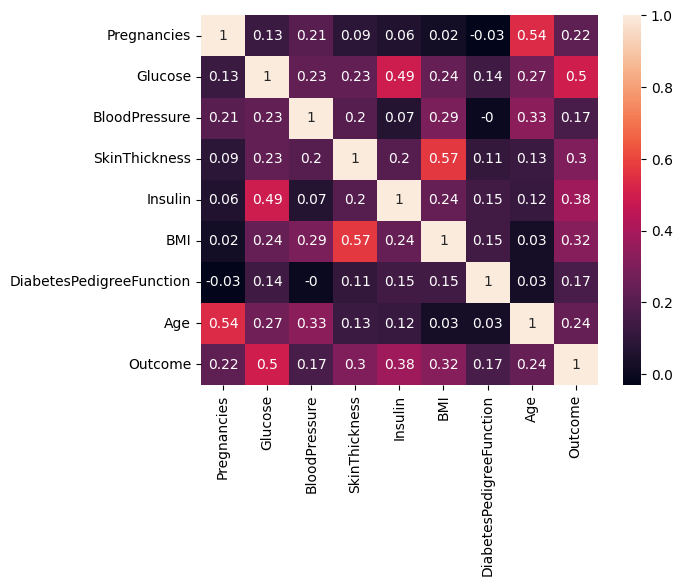

In [148]:
heatmap1=df.corr().round(2)
sns.heatmap(heatmap1,annot=True)

In [149]:
norm=MinMaxScaler().fit(df)
X_norm=norm.transform(df)
X_norm1=pd.DataFrame(X_norm)

### Model Building

In [150]:
X=X_norm1.iloc[:,:-1]
Y=X_norm1.iloc[:,-1]

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [152]:
lr = LogisticRegression(C = 10, solver = 'liblinear')

In [153]:
lr.fit(X_train,Y_train)

LogisticRegression(C=10, solver='liblinear')

### Evaluation of model

In [158]:
Y_pred=lr.predict(X_test)

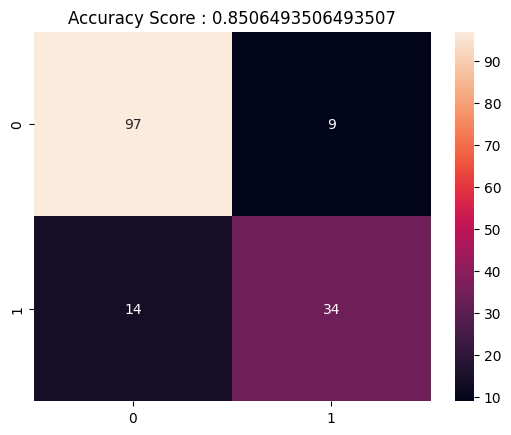

In [159]:
cm = confusion_matrix(Y_test, Y_pred)
acc=accuracy_score(Y_test, Y_pred)
sns.heatmap(cm,annot=True)
plt.title("Accuracy Score : {0}".format(acc))
plt.show()


In [156]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       106
         1.0       0.79      0.71      0.75        48

    accuracy                           0.85       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.85      0.85      0.85       154



In [157]:
lr.predict([[2,197,70,99,0,34.7,0.575,62]])

array([1.])